In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
KO_list = ['ARGLU1', 'ASF1B', 'MSN', 'DNAJC3', 'MLLT6', 'STK38L', 'HSPG2', 'CHPF', 'TBX1', 'BUB1', 'KIF11', 'RCN1']

all_results = {}
for ko in KO_list:
    all_results["FLeCS (" + ko + ")"] = pd.read_csv("logs/analysis_ genes_most_affected_edges_" + ko + "_mean_diff.txt",
                                                    sep="\t", 
                                               skiprows=11)

    all_results["DE (" + ko + ")"] = pd.read_csv("logs/analysis_ DE_genes_" + ko + "_ko.txt", sep="\t", 
                                            skiprows=11)
    
    all_results["GENIE3 (" + ko + ")"] = pd.read_csv("logs/analysis_ genie3_affected_genes_" + ko + ".txt", sep="\t", 
                                            skiprows=11)
    
    all_results["GENIE3 with GRN prior (" + ko + ")"] = pd.read_csv("logs/analysis_ genie3_grn_affected_genes_" + ko + ".txt", sep="\t", 
                                            skiprows=11)

all_results["Random"] = pd.read_csv("logs/analysis_ rand_subsamp_genes.txt", sep="\t", skiprows=11)

In [7]:
all_res_df = []

for ko in KO_list:
    res_df = pd.DataFrame(list(all_results["FLeCS (" + ko + ")"]["genes_most_affected_edges_" + ko + 
                                                                 "_mean_diff.txt" + ' (raw P-value)']))
    res_df.columns = ["P-value"]
    res_df["method"] = "FLeCS (" + ko + ")"
    all_res_df.append(res_df)

    res_df = pd.DataFrame(list(all_results["DE (" + ko + ")"]["DE_genes_" + ko + "_ko.txt" + ' (raw P-value)']))
    res_df.columns = ["P-value"]
    res_df["method"] = "DE (" + ko + ")"
    all_res_df.append(res_df)

    res_df = pd.DataFrame(list(all_results["GENIE3 (" + ko + ")"]["genie3_affected_genes_" + ko + ".txt" + ' (raw P-value)']))
    res_df.columns = ["P-value"]
    res_df["method"] = "GENIE3 (" + ko + ")"
    all_res_df.append(res_df)

    res_df = pd.DataFrame(list(all_results["GENIE3 with GRN prior (" + ko + ")"]["genie3_grn_affected_genes_" + ko + ".txt" + ' (raw P-value)']))
    res_df.columns = ["P-value"]
    res_df["method"] = "GENIE3 with GRN prior (" + ko + ")"
    all_res_df.append(res_df)

res_df = pd.DataFrame(list(all_results["Random"]["rand_subsamp_genes.txt" + ' (raw P-value)']))
res_df.columns = ["P-value"]
res_df["method"] = "Random"
all_res_df.append(res_df)

all_res_df = pd.concat(all_res_df)

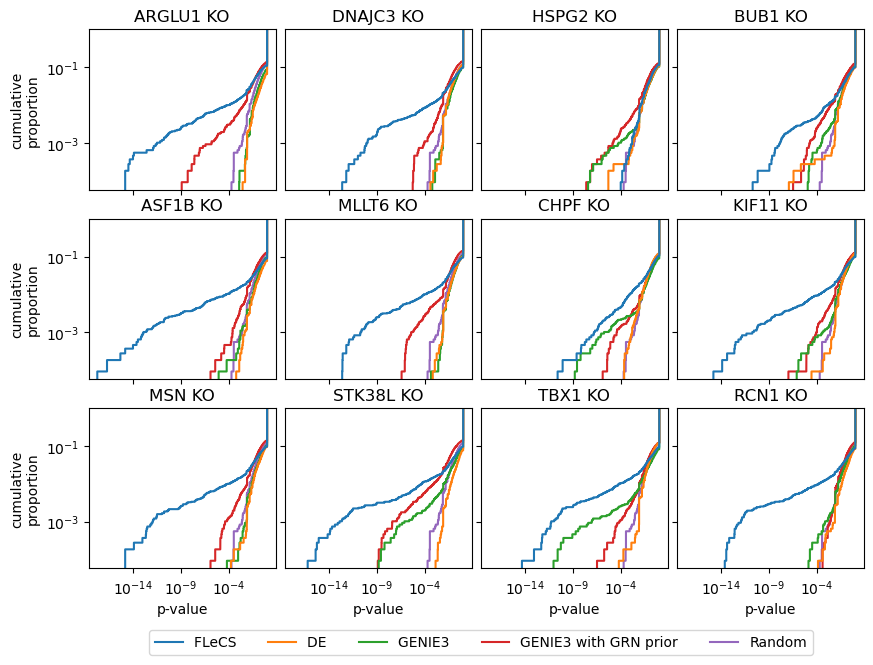

In [111]:
f, axes = plt.subplots(3, 4, figsize=(10, 7), sharex=True, sharey=True)
for i, ko in enumerate(KO_list):
    k = i % 3
    l = i // 3
    this_plot_df = all_res_df[all_res_df["method"].apply(lambda v: (ko in v) or (v == "Random"))].copy()
    this_plot_df["method"] = this_plot_df["method"].apply(lambda x: x.split("(")[0])

    g = sns.ecdfplot(data=this_plot_df, x="P-value", hue="method", log_scale=(True, True), ax=axes[k, l])
    g.set_title(ko + " KO")
    g.set_xlabel("p-value")
    g.set_ylabel("cumulative\nproportion")
    if i != 0:
        axes[k, l].get_legend().remove()
    else:
        sns.move_legend(axes[k, l], ncol=5, loc="upper center", bbox_to_anchor=(2.1, -2.7), title="")

plt.subplots_adjust(wspace=0.05, hspace=0.18)

plt.show()

## Plot most enriched GO terms

In [41]:
def plot_enriched_go_terms(ko):
    ko_results = pd.read_csv("logs/analysis_ genes_most_affected_edges_" + ko + "_mean_diff.txt", sep="\t", skiprows=11)
    ko_results[ko_results.columns[5]] = ko_results[ko_results.columns[5]].apply(lambda x: "100" if x == " > 100" else x).apply(lambda x: "0" if x == " < 0.01" else x).astype(float)

    p_value_col_name = [n for n in ko_results.columns if n.endswith("(raw P-value)")][0]
    ko_results = ko_results.rename(columns={p_value_col_name: "P-value"})
    ko_results["- log(P-value)"] = ko_results["P-value"].apply(lambda x: -np.log(x))

    plt.figure(figsize=(3, 12))
    plt.title(ko)
    plt.xscale("log")
    ax = sns.scatterplot(data=ko_results.loc[:60], 
                        y="GO biological process complete", 
                    x=ko_results.columns[5],  
                    hue="- log(P-value)", 
                    size="- log(P-value)",
                    sizes=(50, 200))
    
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.xlabel("fold Enrichment")
    plt.show()

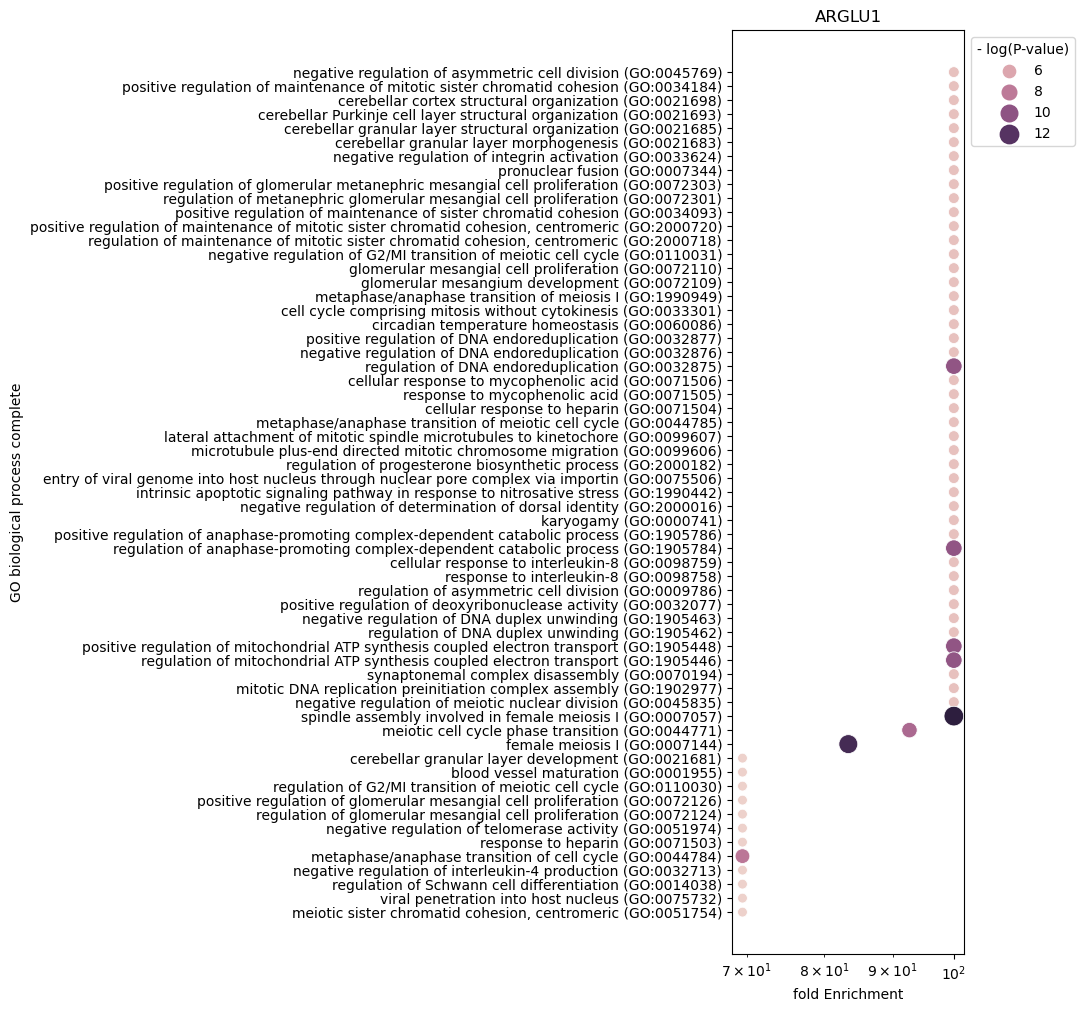

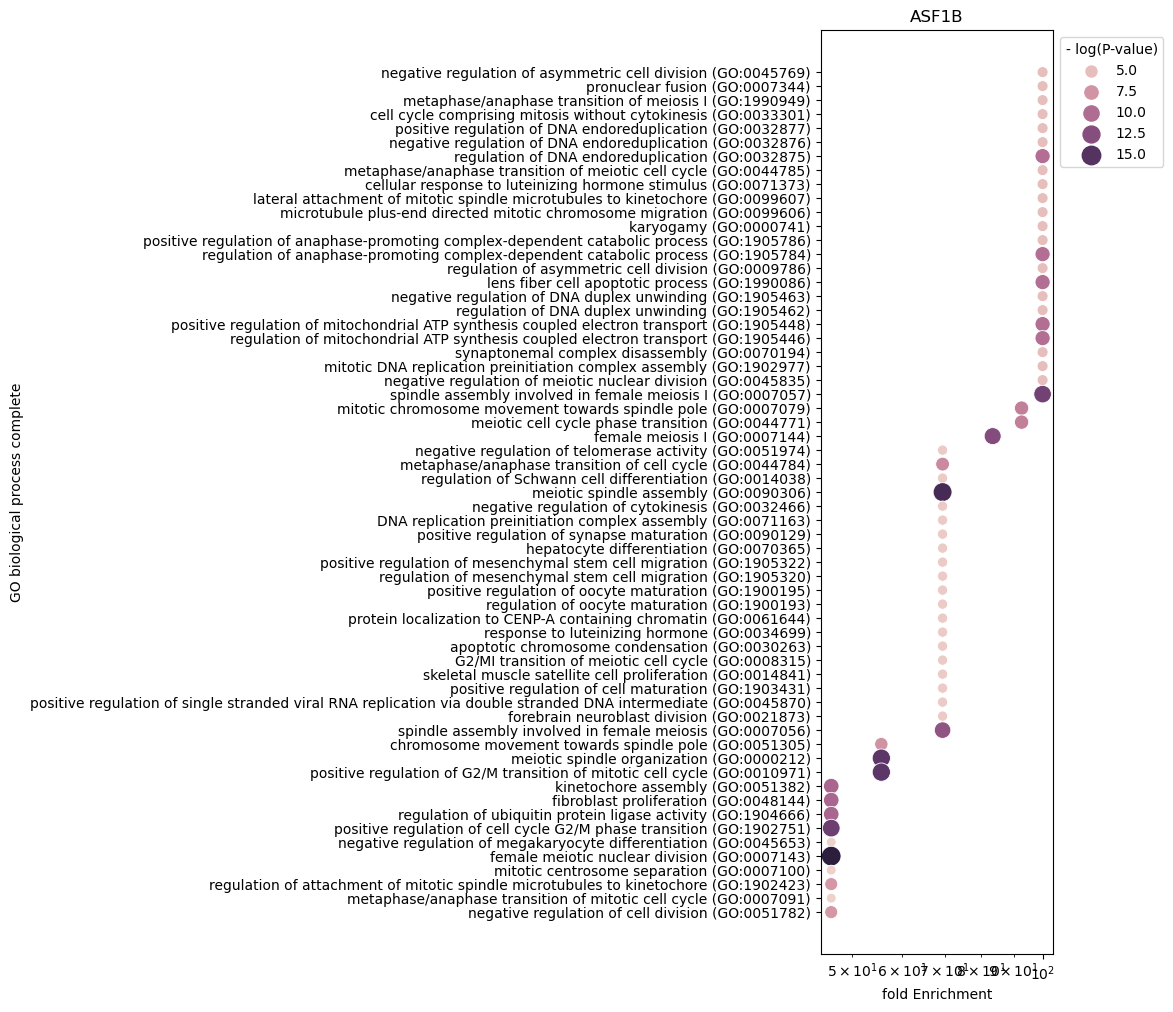

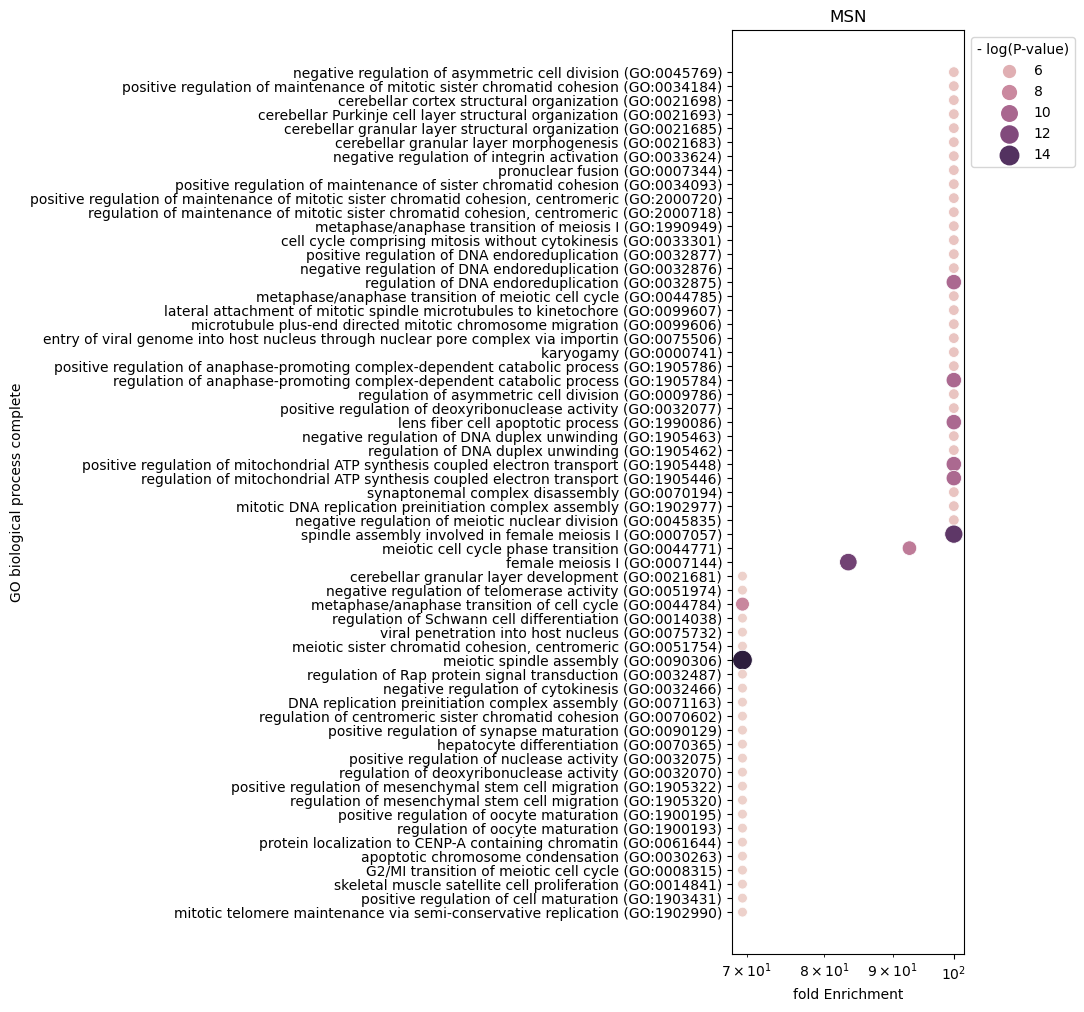

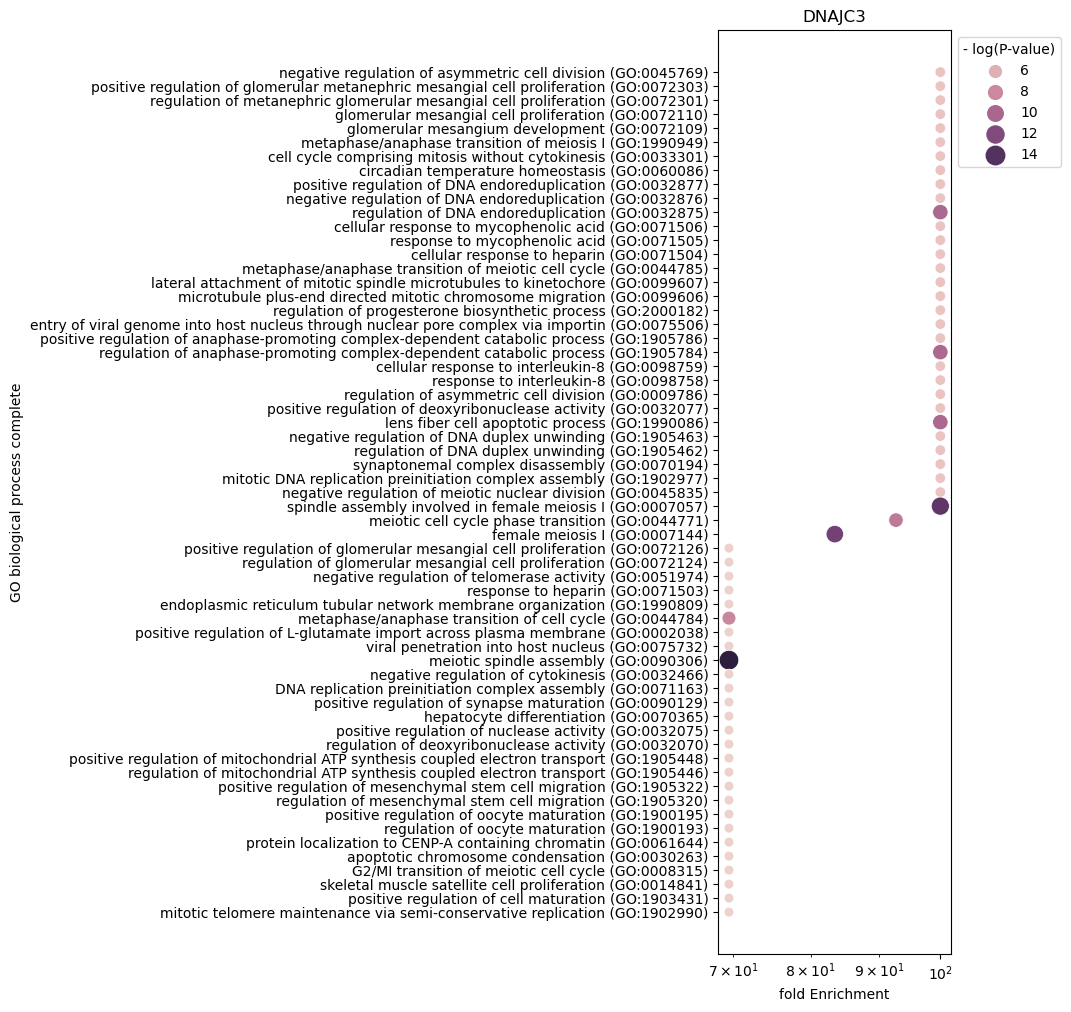

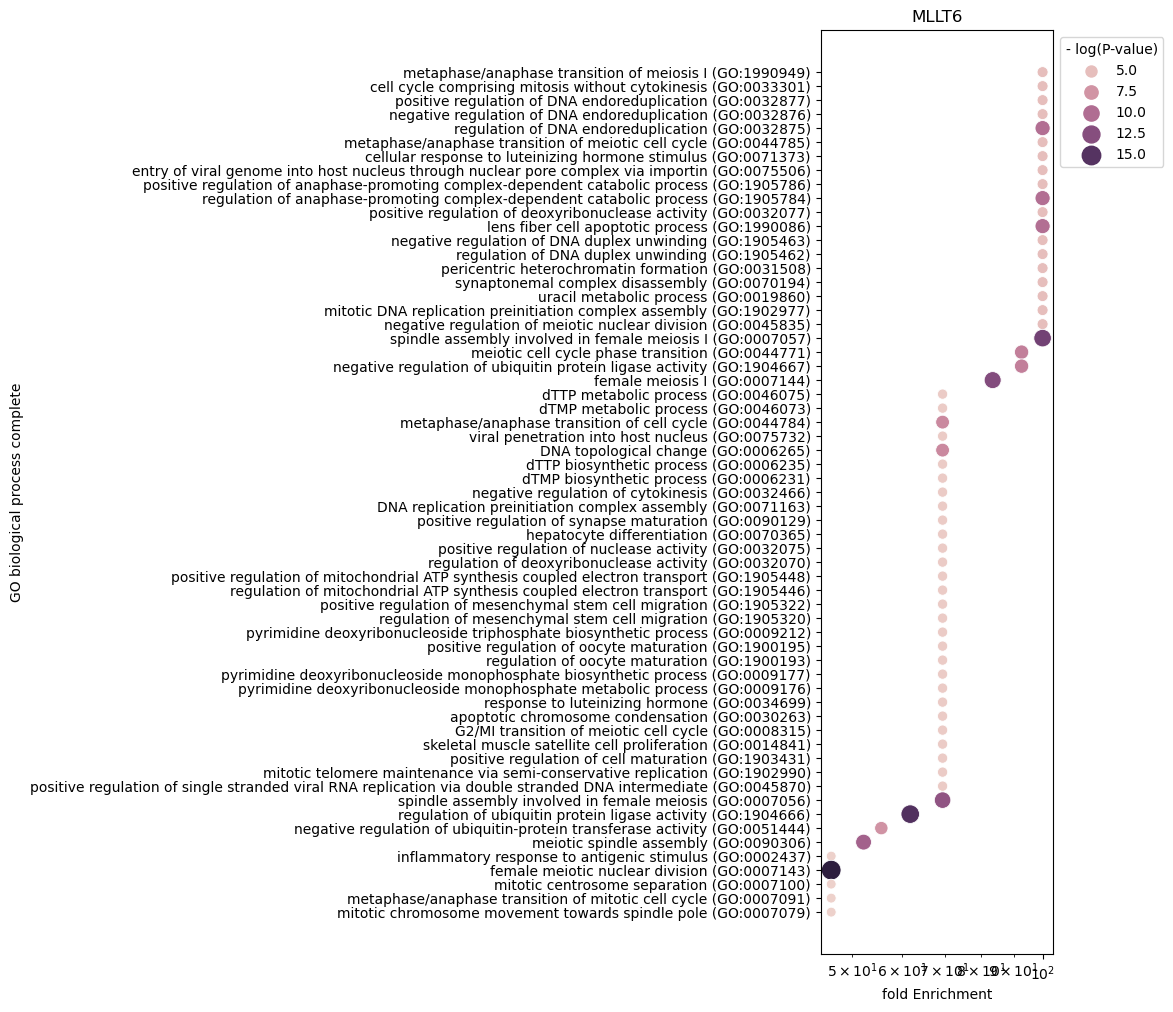

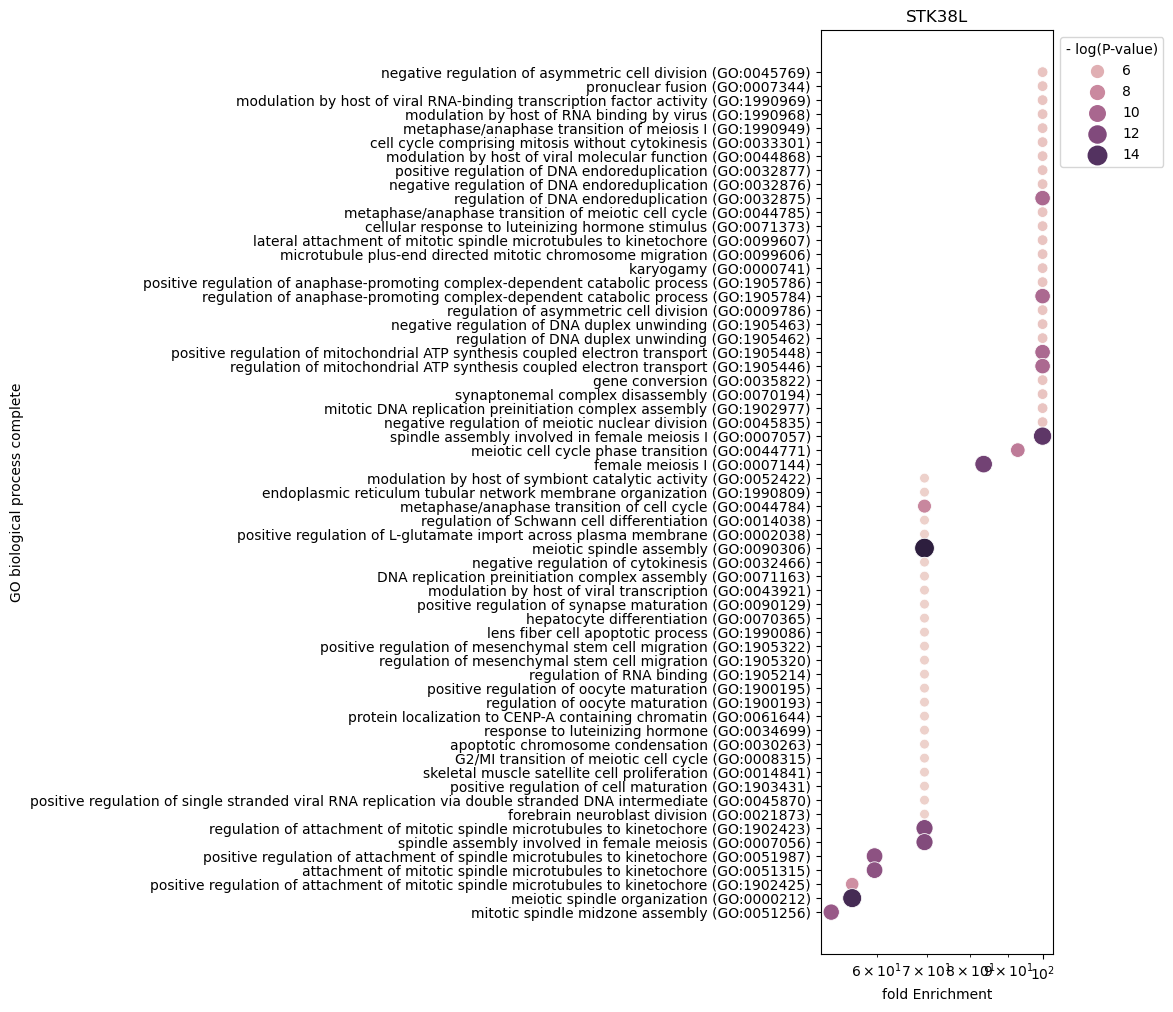

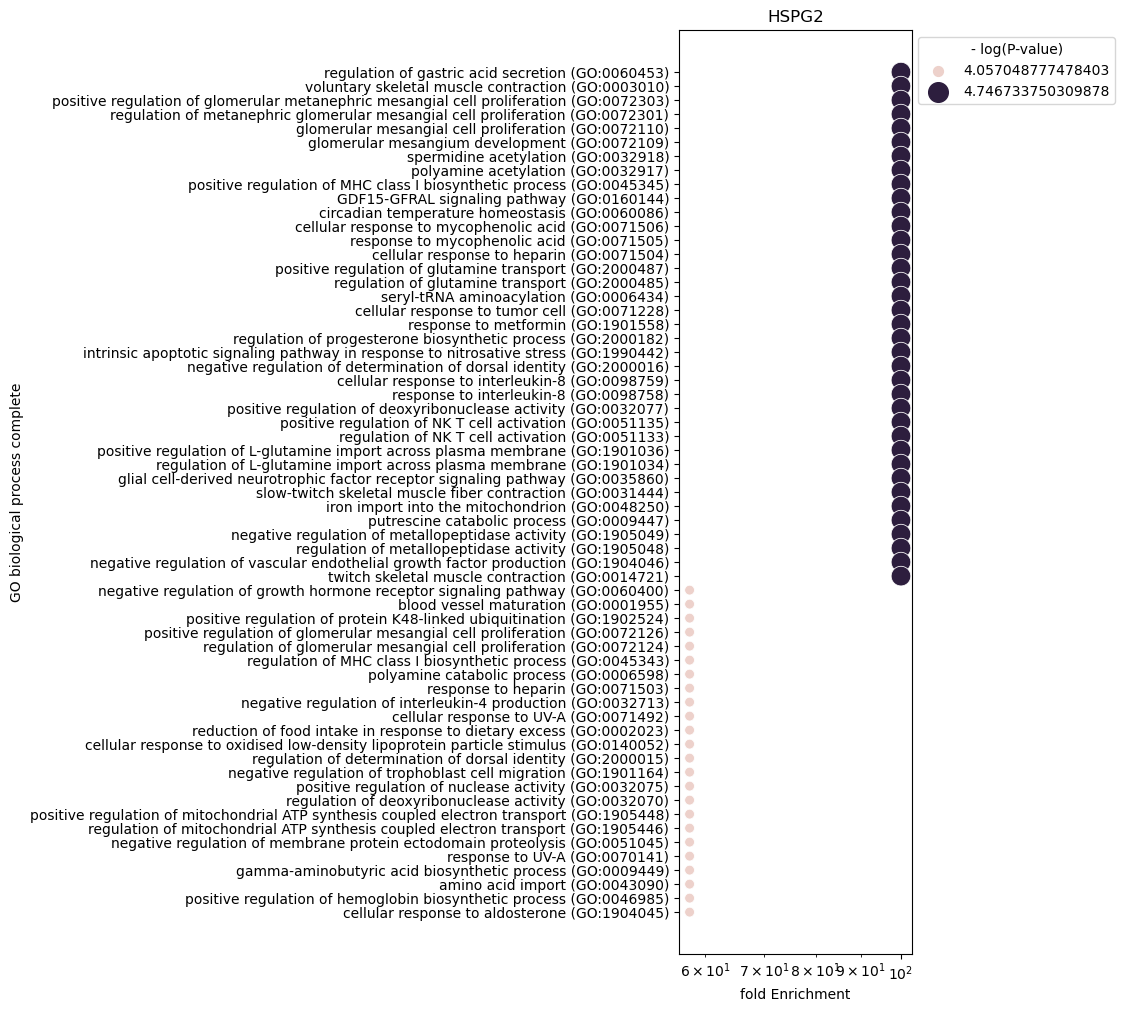

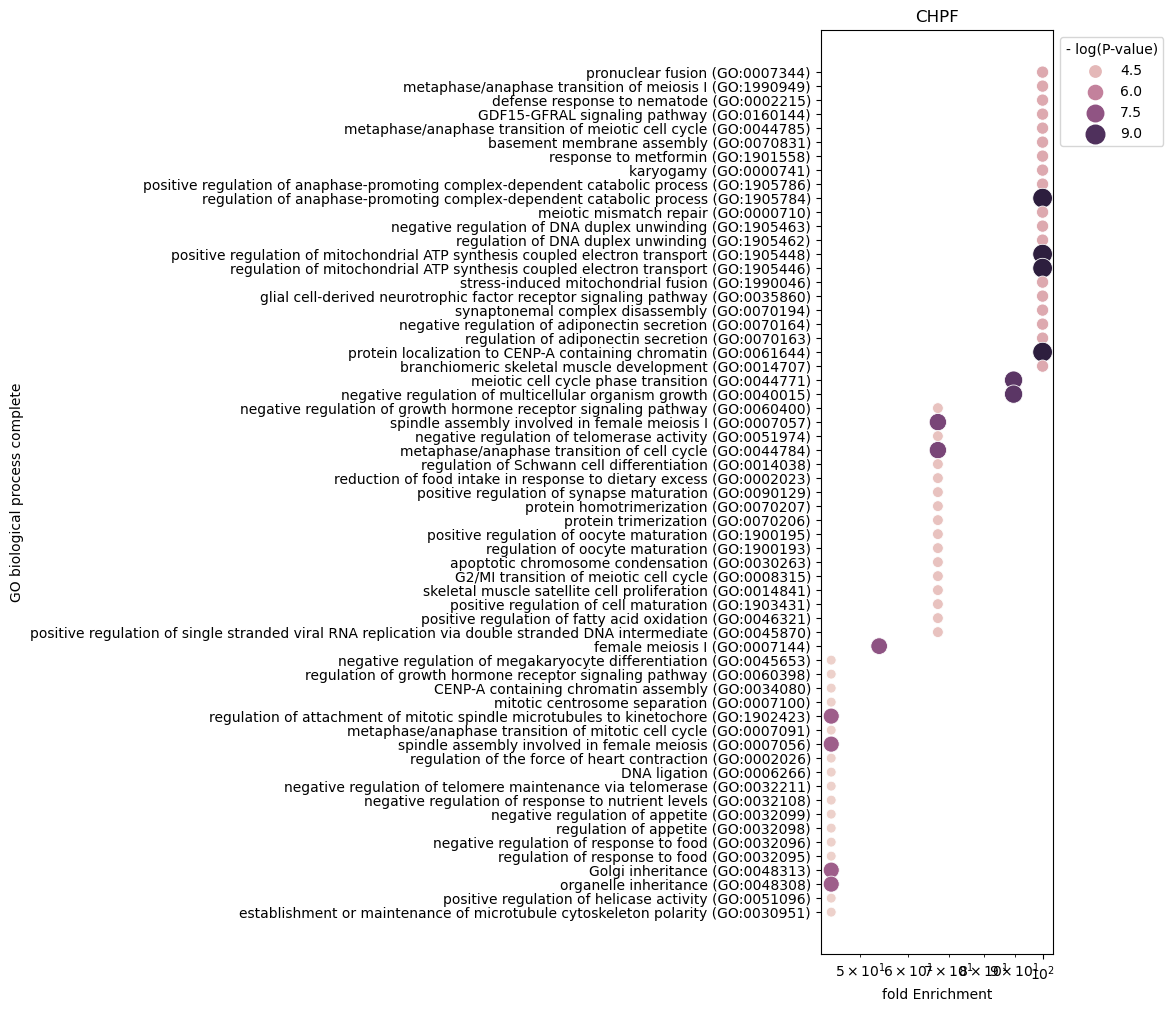

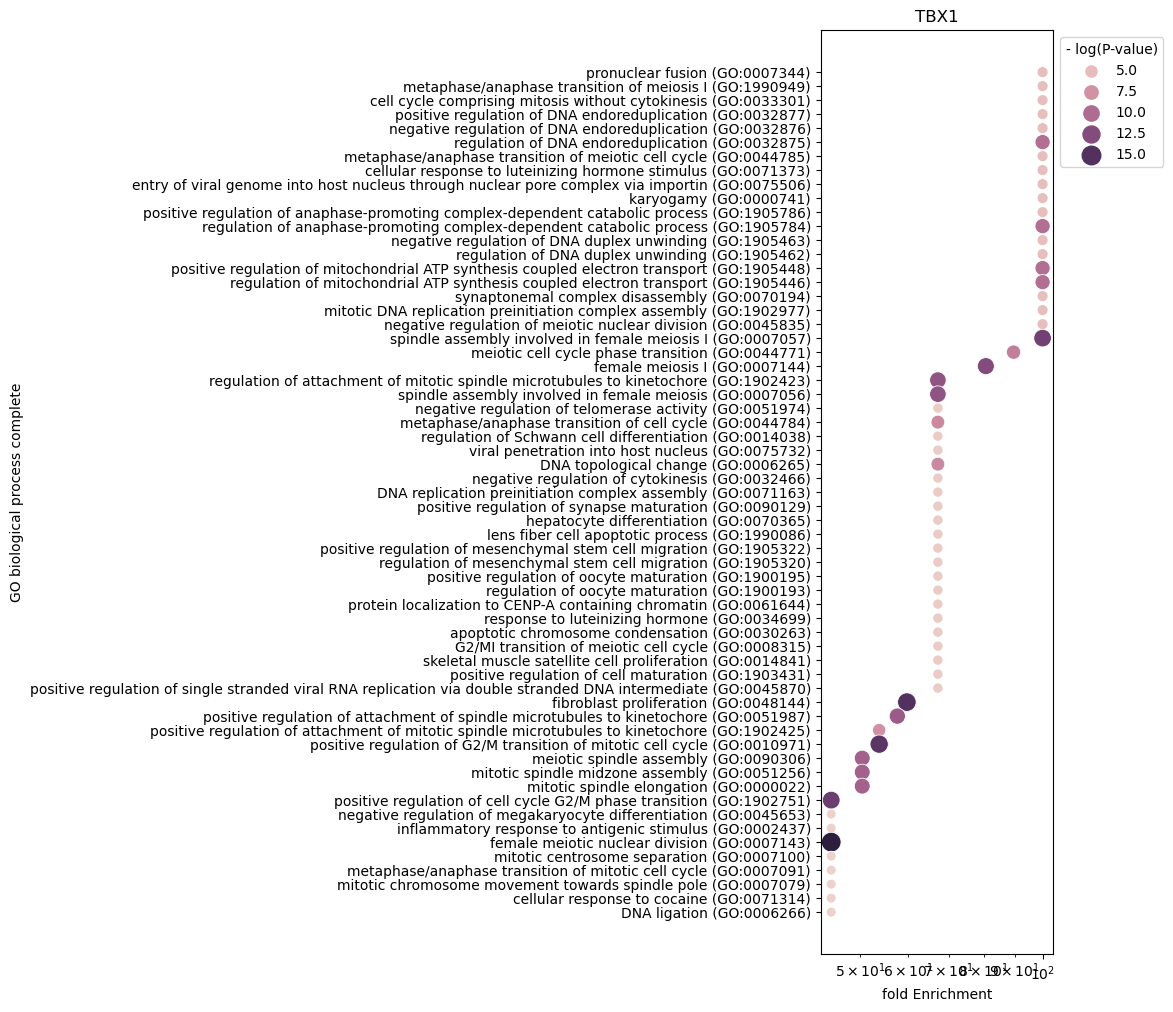

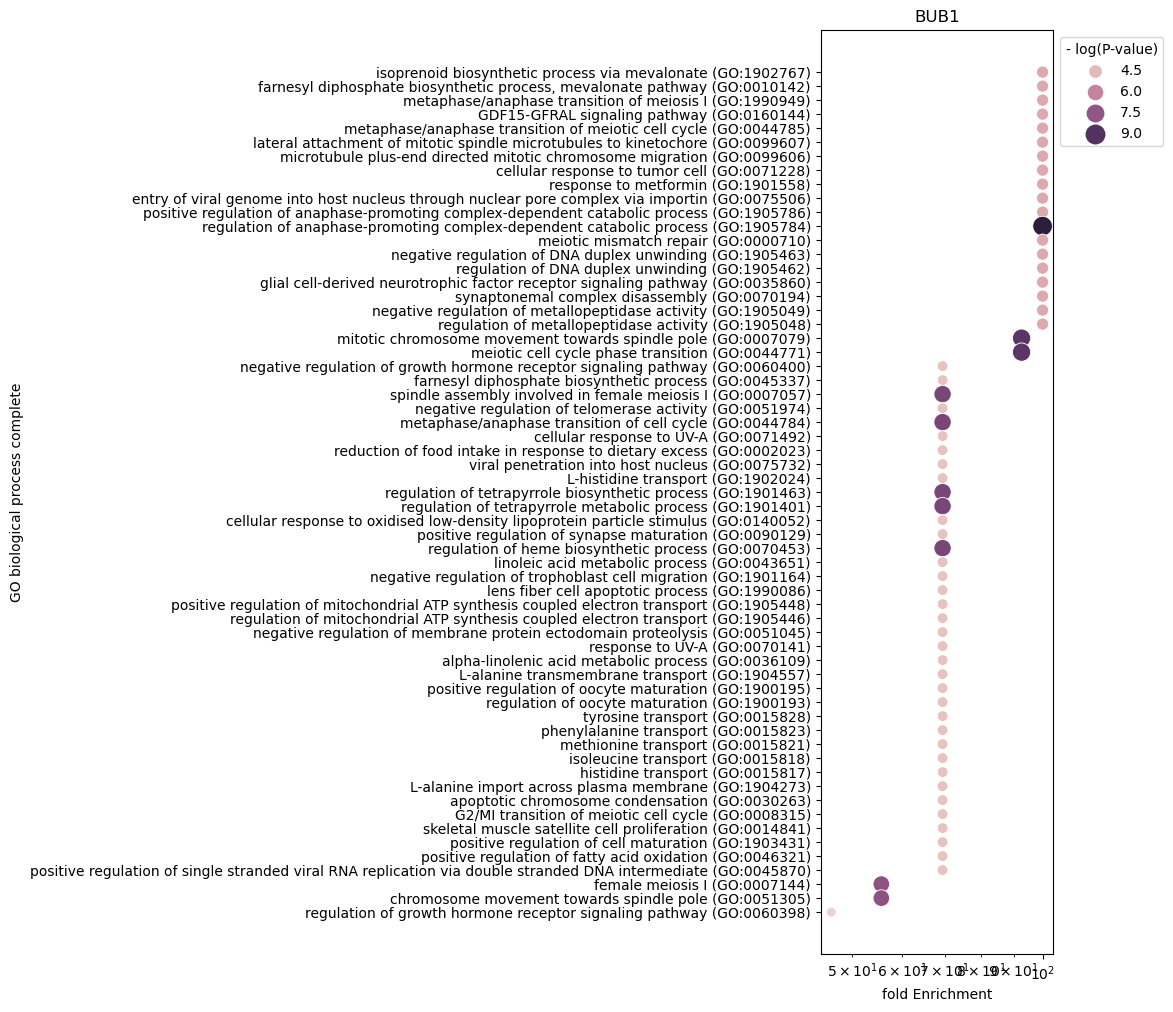

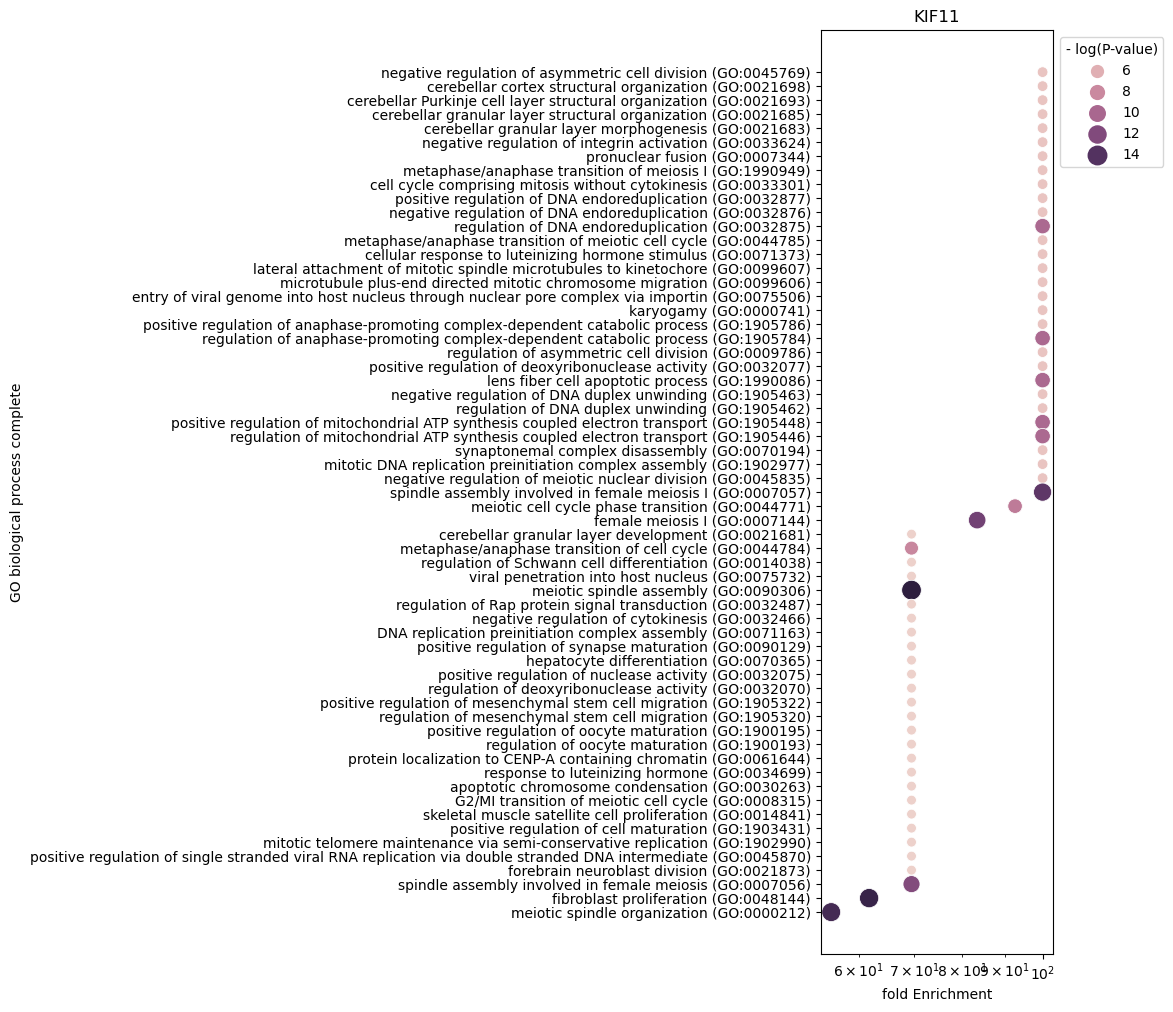

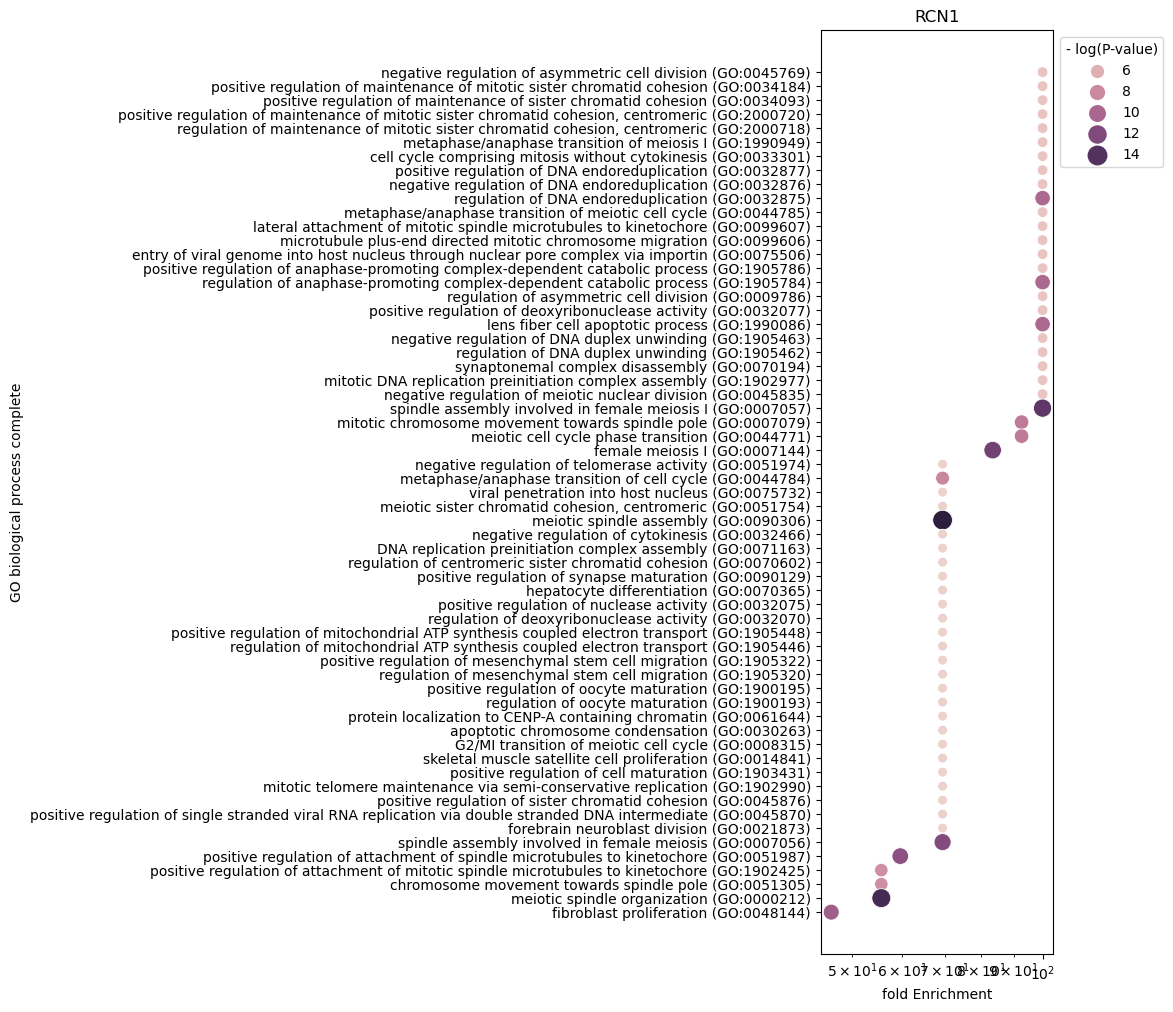

In [42]:
for ko in KO_list:
    plot_enriched_go_terms(ko)
